# 05/01/2024 

# Non Fram Payrolls analysis Descriptive and inferential statistics

What are the NFP or non farm payrolls? why it is an economic indicator of first order? 

It measures the number of employed people in the **non-agricultural sector**. The Bureau of Labor Statistics (BLS) releases the NFP data monthly as part of the Employment Situation report, typically on the first Friday of the month, the report includes:

+ The change in non-farm payrolls: This is the main indicator, showcasing the net number of jobs created or lost in the non-farm sector compared to the previous month.

+ The unemployment rate: This measures the percentage of the labor force that is actively seeking work and not employed.

+ Average hourly earnings: This shows the average hourly wage or salary for all employees in the non-farm sector.

+ Labor force participation rate: This reflects the percentage of the adult population that is either employed or actively seeking work.

**Why are non-farm payrolls important?**

NFP is considered a crucial indicator for the health of the US economy for these reasons:

+ Employment growth: Strong job creation generally indicates a healthy economy and strong consumer spending, impacting growth.

+ Policy decisions: The Federal Reserve closely monitors NFP to make decisions about interest rates and monetary policy.

+ Market movements: NFP releases often cause significant fluctuations in the stock market and other financial markets.

**Understanding NFP:**

The reported figure refers to the net change in jobs, meaning it accounts for both jobs created and lost. NFP generally fluctuates within a certain range **(around 10,000 to 250,000 in non-recessional periods)**, and large variations can attract significant attention.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("bmh")

This is the data from this webpage: https://es.investing.com/economic-calendar/nonfarm-payrolls-227

# Descriptive statistic

In [2]:
pd.read_excel("non_farm_payrolls_investing.xlsx").head() 

,Fecha de publicación,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Hora,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Previsión,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Anterior
0,05.01.2024 (Dic),NaN,NaN,NaN,NaN,NaN,NaN,14:30,NaN,NaN,...,NaN,NaN,NaN,NaN,170K,NaN,NaN,NaN,NaN,173K
1,08.12.2023 (Nov),NaN,NaN,NaN,NaN,NaN,NaN,14:30,NaN,NaN,...,NaN,NaN,NaN,NaN,180K,NaN,NaN,NaN,NaN,150K
2,03.11.2023 (Oct),NaN,NaN,NaN,NaN,NaN,NaN,13:30,NaN,NaN,...,NaN,NaN,NaN,NaN,180K,NaN,NaN,NaN,NaN,297K
3,06.10.2023 (Sep),NaN,NaN,NaN,NaN,NaN,NaN,13:30,NaN,NaN,...,NaN,NaN,NaN,NaN,170K,NaN,NaN,NaN,NaN,227K
4,01.09.2023 (Ago),NaN,NaN,NaN,NaN,NaN,NaN,13:30,NaN,NaN,...,NaN,NaN,NaN,NaN,170K,NaN,NaN,NaN,NaN,157K


In [3]:
pd.read_excel("non_farm_payrolls_investing.xlsx").columns

Index(['Fecha de publicación', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Hora', 'Unnamed: 8',
       'Unnamed: 9', 'Actual', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Previsión', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Anterior'],
      dtype='object')

In [4]:
nfp = pd.read_excel("non_farm_payrolls_investing.xlsx")[["Fecha de publicación", "Hora", "Actual", "Previsión", "Anterior"]]

In [5]:
nfp = nfp.rename(columns = {"Fecha de publicación": "Time of Release", "Hora" : "Time", "Actual" : "Actual"
                            , "Previsión" : "Expected", "Anterior" : "Before"})

In [6]:
nfp.head()

,Time of Release,Time,Actual,Expected,Before
0,05.01.2024 (Dic),14:30,216K,170K,173K
1,08.12.2023 (Nov),14:30,199K,180K,150K
2,03.11.2023 (Oct),13:30,150K,180K,297K
3,06.10.2023 (Sep),13:30,336K,170K,227K
4,01.09.2023 (Ago),13:30,187K,170K,157K


Now that we have our data organized let's explore it.

In [7]:
nfp.isnull().sum() # we have some null values in the expected column

Time of Release      0
Time                 0
Actual               0
Expected           458
Before               0
dtype: int64

In [8]:
nfp["Actual"].value_counts()

Actual    14
162K       5
223K       5
211K       5
235K       5
          ..
279K       1
136K       1
341K       1
512K       1
153K       1
Name: Actual, Length: 400, dtype: int64

In [9]:
nfp = nfp.loc[nfp["Actual"] != "Actual", :]

**Let's plot the distribution of the NFP**

We need to change the datatype of the **Actual column**

In [10]:
type(nfp["Actual"][0]) # we have strings but we need to plot integers on a histogram

str

In [11]:
nfp["Actual"] = nfp["Actual"].apply(lambda x : x[:-1]) # obtaining only the string numbers
nfp["Actual"] = nfp["Actual"].apply(lambda x : x.replace(".", "")) # replacing . by nothing to have a clean number
nfp["Actual"] = nfp["Actual"].apply(lambda x : x.replace(",", "")) # replacing , by nothing to have a clean number

In [12]:
nfp["Actual"] = nfp["Actual"].astype(int) # here we convert from string to integers

In [13]:
min_nfp = nfp["Actual"].min()
max_nfp = nfp["Actual"].max()

In [14]:
range_nfp = max_nfp - min_nfp 
range_nfp # this is the range of this dataset of NFP

25337

In [15]:
range_nfp / 1000 # if we place 1000 buckets we will have a lenght of almost 26 per bucket

25.337

In [16]:
mean_nfp = round(nfp["Actual"].mean(), 2)
median_nfp = nfp["Actual"].median()

In [17]:
mean_nfp

131.73

In [18]:
median_nfp

173.0

**Now let's plot the distribution**

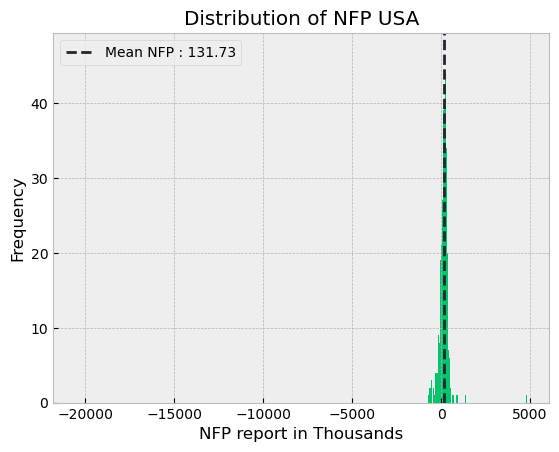

In [19]:
plt.hist(nfp["Actual"], bins = 1000, color = "#05c46b")
plt.title("Distribution of NFP USA")
plt.xlabel("NFP report in Thousands")
plt.ylabel("Frequency")
plt.axvline(mean_nfp, label = f"Mean NFP : {mean_nfp}", linestyle = "--", color = "#1e272e")
plt.legend()
plt.show()

**Looks like we have some outliers on the left and on the right and we can't visualize our data very well**

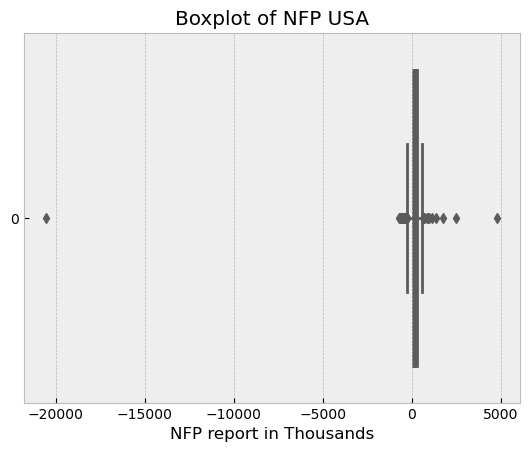

In [20]:
sns.boxplot(nfp["Actual"], orient = "h", color = "#f53b57") # we are going to plot a boxplot to see how it looks
plt.title("Boxplot of NFP USA")
plt.xlabel("NFP report in Thousands")
plt.show()

Looks like we can't visualize this data very well.

What is its **standard deviation** and **interquartile range IQR of this dataset with outliers**? 

In [21]:
nfp["Actual"].describe()

count      649.000000
mean       131.734977
std        866.500268
min     -20537.000000
25%         54.000000
50%        173.000000
75%        271.000000
max       4800.000000
Name: Actual, dtype: float64

In [22]:
IQR = nfp["Actual"].describe().loc["75%"] - nfp["Actual"].describe().loc["25%"]
IQR

217.0

Every observation that is < Q1 - 1.5(IQRQ) is an outlier as well as > Q3 + 1.5(IQR)

# A treatment for the data 

Some process that can change the population dataset is called a treatment and that is what we are going to do. We are going to remove outliers.

In [23]:
Q1 = nfp["Actual"].describe().loc["25%"]
Q3 = nfp["Actual"].describe().loc["75%"]

In [24]:
Q1 - (1.5 * IQR)

-271.5

In [25]:
Q3 + (1.5 * IQR)

596.5

So the range of the whiskers is between **-271.5 and 596.5**  everything outside of this range is an outlier.

In [26]:
len(nfp[nfp["Actual"] < Q1 - (1.5 * IQR)]["Actual"])

27

In [27]:
nfp[nfp["Actual"] < Q1 - (1.5 * IQR)]

,Time of Release,Time,Actual,Expected,Before
45,08.05.2020 (Abr),13:30,-20537,-22.000K,-870K
46,03.04.2020 (Mar),13:30,-701,-100K,275K
178,2009-07-02 00:00:00,13:30,-467,-375K,-322K
179,2009-06-05 00:00:00,13:30,-345,-521K,-504K
180,2009-05-08 00:00:00,13:30,-539,-580K,-699K
181,2009-04-03 00:00:00,13:30,-663,-662K,-651K
182,2009-03-06 00:00:00,14:30,-651,-636K,-598K
183,2009-02-06 00:00:00,14:30,-598,-530K,-524K
184,2009-01-09 00:00:00,14:30,-524,-475K,-533K
185,2008-12-05 00:00:00,14:30,-533,-320K,-240K


In [28]:
len(nfp[nfp["Actual"] > Q3 + (1.5 * IQR)]["Actual"])

12

In [29]:
nfp[nfp["Actual"] > Q3 + (1.5 * IQR)]

,Time of Release,Time,Actual,Expected,Before
23,04.03.2022 (Feb),14:30,678,400K,481K
30,06.08.2021 (Jul),13:30,943,870K,938K
31,02.07.2021 (Jun),13:30,850,700K,583K
34,02.04.2021 (Mar),13:30,916,647K,468K
39,06.11.2020 (Oct),14:30,638,600K,672K
40,02.10.2020 (Sep),13:30,661,850K,1.489K
41,04.09.2020 (Ago),13:30,1371,1.400K,1.734K
42,07.08.2020 (Jul),13:30,1763,1.600K,4.791K
43,02.07.2020 (Jun),13:30,4800,3.000K,2.699K
44,05.06.2020 (May),13:30,2509,-8.000K,-20.687K


In [30]:
low_outliers =  Q1 - (1.5 * IQR)
high_outliers = Q3 + (1.5 * IQR)

In [31]:
without_outliers = nfp[(nfp["Actual"] > low_outliers) & (nfp["Actual"] < high_outliers)] 
# everything inside this range (-271.5 and 596.5)

In [32]:
mean_nfp_no_outliers = round(without_outliers["Actual"].mean(), 2)
mean_nfp_no_outliers

163.96

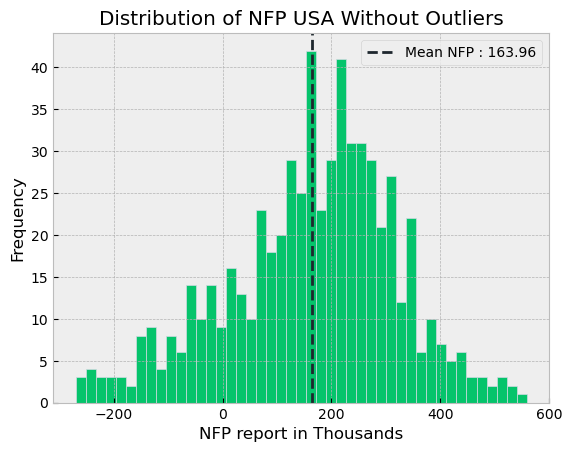

In [33]:
plt.hist(without_outliers["Actual"], color = "#05c46b", edgecolor = "#d2dae2", bins = 45)
plt.title("Distribution of NFP USA Without Outliers")
plt.xlabel("NFP report in Thousands")
plt.ylabel("Frequency")
plt.axvline(mean_nfp_no_outliers, label = f"Mean NFP : {mean_nfp_no_outliers}", linestyle = "--", color = "#1e272e")
plt.legend()
plt.show()

**As we can see the distribution without outliers is approximately normal**

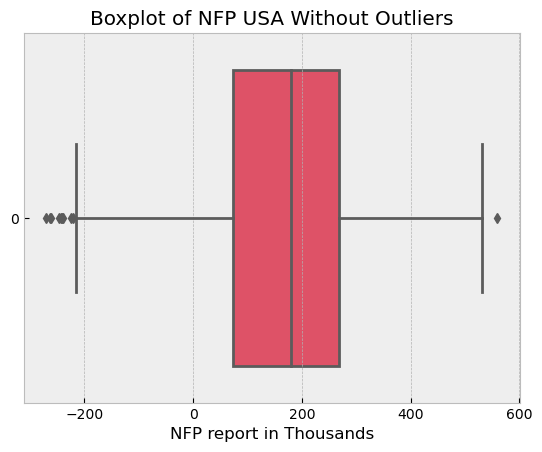

In [34]:
sns.boxplot(without_outliers["Actual"], orient = "h", color = "#f53b57")
plt.title("Boxplot of NFP USA Without Outliers")
plt.xlabel("NFP report in Thousands")
plt.show()
plt.show()

In [35]:
without_outliers["Actual"].describe()

count    610.000000
mean     163.959016
std      155.665318
min     -270.000000
25%       74.000000
50%      179.500000
75%      267.750000
max      559.000000
Name: Actual, dtype: float64

In [36]:
IQR = without_outliers["Actual"].describe().loc["75%"] - nfp["Actual"].describe().loc["25%"]
IQR # we have an interquartile range very similar to the data with outliers

213.75

**What is the skew of the data with outliers and the data without outliers?**

In [37]:
from scipy import stats

In [38]:
round(stats.skew(nfp["Actual"]), 2) # this dataset is higly skwed

-20.68

In [39]:
round(stats.skew(without_outliers["Actual"]), 2) # after removing outliers we got a more normal distribution

-0.41

A normal distribution, by definition, has a **skew of 0**. This is because it is perfectly symmetrical around its mean, with equal weight on the left and right tails of the bell curve. Any non-zero skew indicates that the distribution deviates from the perfect symmetry of a normal distribution.

However, in practice, **some datasets may approximate a normal distribution** even with a slight skew. Here are some general guidelines:

+ Absolute skew < 0.5: Generally considered approximately normal. Statistical tests for normality may still reject it, but the practical impact on your analysis might be minimal.

+ 0.5 ≤ absolute skew ≤ 1: Moderately skewed. You might want to consider transformations or alternative non-parametric methods depending on your analysis goals.

+ Absolute skew > 1: Highly skewed. It's unlikely that assuming normality is appropriate at this level of asymmetry.

In [40]:
len(nfp) # this is the total lenght of the original data 

649

In [41]:
len(nfp[nfp["Actual"] < Q1 - (1.5 * IQR)]["Actual"]) + len(nfp[nfp["Actual"] > Q3 + (1.5 * IQR)]["Actual"])
# this is the number of outliers

40

In [42]:
proportion_outliers = round((40 / 649) * 100, 2)
proportion_outliers # we have less than 10% of observations which are outliers

6.16

Based on this brief descriptive and exploratory data analysis we are going to use the dataset without outliers in order to make inferences about **point estimators, confidence intervals and hypothesis testing.** 

In [43]:
without_outliers.to_excel("nfp_without_outliers.xlsx")